In [ ]:
#Import image library
from IPython.display import Image, HTML, display

In [ ]:
display(HTML("<table><tr><td><img src='imgs/meb.png', width = 100></td><td><img src='imgs/thku.png', width = 100></td><td><img src='imgs/aku.png', width = 112></td></tr></table>"))

## Ajanda
-  Derin Öğrenme ile Görüntü İşleme Uygulamaları

### Dijital görüntü işleme
- Dijital görüntü işleme, dijital görüntüleri oluşturmak, işlemek, iletmek ve görüntülemek için bilgisayar algoritmalarının kullanılmasıdır. 
- Dijital görüntü işleme algoritmaları şu amaçlarla kullanılabilir:
    1. Görüntü sensöründen gelen sinyalleri dijital görüntülere dönüştürmek,
    2. Netliği artırmak ve gürültüyü ve diğer artefaktları kaldırmak
    3. Bir mekandaki nesnelerin boyutunu, ölçeğini veya sayısını çıkarmak,
    4. Görüntüleri görüntülemek veya yazdırmak için hazırlamak,
    5. Bir ağ üzerinden iletişim için görüntüleri sıkıştırma.
- Temel olarak
    1. İnsan yorumu için resimli bilgilerde iyileştirme
    2. Otonom makine algısı için depolama, iletim ve temsil için görüntü verilerinin işlenmesi.


#### Dijital Görüntünün Kökeni
- Dijital görüntünün ilk uygulaması, fotoğrafların ilk kez Londra ve New York arasında denizaltı kablosuyla gönderildiği gazete endüstrisinde oldu.
- 1921'deki kablolu resim iletimi, bir resmi Atlantik'te bir haftadan fazla taşımak için gereken süreyi 3 saatten daha azına indirdi.

## Dijital Görüntü nedir?
- Dijital Görüntü, iki boyutlu veya üç boyutlu bir mekanın uzamsal bir temsilidir.

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import cv2
#plt.style.use('seaborn')
%matplotlib inline

In [2]:
A=np.random.randint(low=0, high=256, size=(200,200,3), dtype=np.uint8)

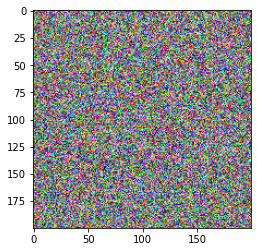

In [3]:
plt.imshow(A)

In [4]:
print(A[0:20,0:20,0:20])

[[[161 248 163]
  [210 122  43]
  [176   1 147]
  ...
  [232  47 129]
  [128  73 156]
  [188  71  47]]

 [[253  46 238]
  [ 82  30  88]
  [192 229 106]
  ...
  [125  86 243]
  [120 151 177]
  [  7 123 171]]

 [[217 250 165]
  [129 238  14]
  [ 31  79 152]
  ...
  [103  38 222]
  [233 218 238]
  [239 137 208]]

 ...

 [[216 118 155]
  [143   3   6]
  [150  32 226]
  ...
  [ 53 119 226]
  [118 215 141]
  [102 115  92]]

 [[127 114 167]
  [ 27 210  18]
  [176  28  62]
  ...
  [ 80 180 161]
  [156 217 182]
  [ 10  77 187]]

 [[ 99 249  12]
  [ 99 225 236]
  [ 31  89  75]
  ...
  [159 225 220]
  [254  11 217]
  [197   9  30]]]


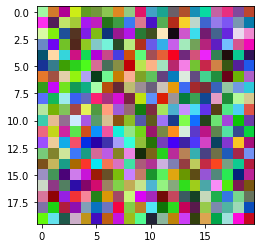

In [5]:
plt.imshow(A[0:20,0:20,0:20])

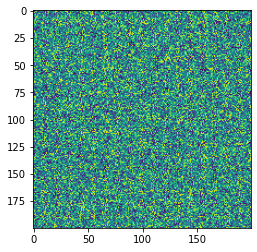

In [6]:
plt.imshow(A[:,:,1])

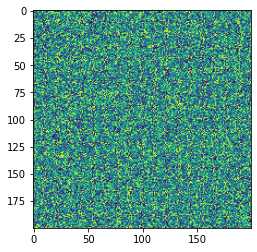

In [7]:
plt.imshow(A[:,:,2])

In [8]:
A=np.random.randint(low=0, high=256, size=(20,20,1), dtype=np.uint)

In [9]:
print(A[0,1])

[197]


TypeError: Invalid shape (20, 20, 1) for image data

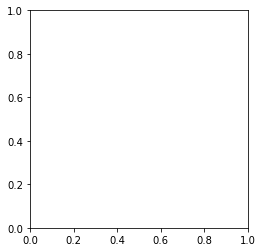

In [10]:
plt.imshow(A,cmap = 'gray')

- Sütunlar ve satırlar halinde düzenlenmiş bir dizi veya matris pikselidir.
- Diğer bir deyişle, özellikle satırlar ve sütunlar halinde düzenlenmiş iki boyutlu bir dizidir. 
- Dijital Görüntü, resim öğeleri, görüntü öğeleri ve piksellerden oluşur. 
- Bir Piksel, Dijital Görüntünün öğelerini belirtmek için en yaygın şekilde kullanılır.

### Dijital Görüntü uygulamaları
- Tıp alanında
- Uzaktan Algılama
- Makine/Robot görüşü
- Video işleme
- Desen tanıma

### Tıp Alanında Görüntü İşleme İhtiyacı
- Endoskop gibi sensörlerin analog çıkışlarını sayısallaştırıcılara ve görüntü işleme sistemlerine arabirimleme
- Siyah Beyaz görüntülerin yoğunluk aralığını değiştirme
- Renkli bir görüntüde renk düzeltme ve renklerin manipülasyonu
- Biyometrik bir görüntüdeki hücrelerin kontur tespiti ve alan hesaplamaları
- Görüntülerin restorasyonu ve yumuşatılması
- 3 Boyutlu Görüntülerin 2 Boyutlu Görüntülere dönnüştürülmesi
- Görüntülerin yakınlaştırılması
- Görüntüden artefaktların kaldırılması.

## Görüntü Filtreleme
- Filtreleri kullanmanın amacı, görüntü özelliklerini değiştirmek veya geliştirmek ve/veya kenarlar, köşeler ve lekeler gibi resimlerden değerli bilgiler çıkarmaktır. 
- Bir filtre, bir görüntü içindeki her piksele ve komşularına uygulanan küçük bir dizi olan bir çekirdek tarafından tanımlanır.

### Temel filtreleme tekniklerinden bazıları şunlardır:
- Düşük Geçişli Filtreleme (Düzeltme) : Düşük geçişli bir filtre, çoğu yumuşatma yönteminin temelidir. Yakındaki piksellerin ortalaması alınarak piksel değerleri arasındaki eşitsizlik azaltılarak bir görüntü yumuşatılır
- Yüksek geçiş filtreleri (Kenar Algılama, Keskinleştirme) : Bir görüntünün daha keskin görünmesini sağlamak için yüksek geçiş filtresi kullanılabilir. Bu filtreler, görüntüdeki ince ayrıntıları vurgular - alçak geçiren filtrenin tersi. Yüksek geçişli filtreleme, düşük geçişli filtrelemeyle aynı şekilde çalışır; sadece farklı bir evrişim çekirdeği kullanır.
- Yönlü Filtreleme: Yönlü filtre, bir görüntünün ilk türevlerini hesaplamak için kullanılabilen bir kenar detektörüdür. Birinci türevler (veya eğimler) en çok, bitişik piksel değerleri arasında büyük bir değişiklik meydana geldiğinde belirgindir. Yönlü filtreler, belirli bir alan içinde herhangi bir yön için tasarlanabilir.
- Laplacian Filtreleme : Laplacian filtresi, bir görüntünün ikinci türevlerini hesaplamak için kullanılan, birinci türevlerin değişme hızını ölçen bir kenar dedektörüdür. Bu, bitişik piksel değerlerindeki bir değişikliğin bir kenardan mı yoksa sürekli ilerlemeden mi olduğunu belirler.

In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.style.use('seaborn')
%matplotlib inline

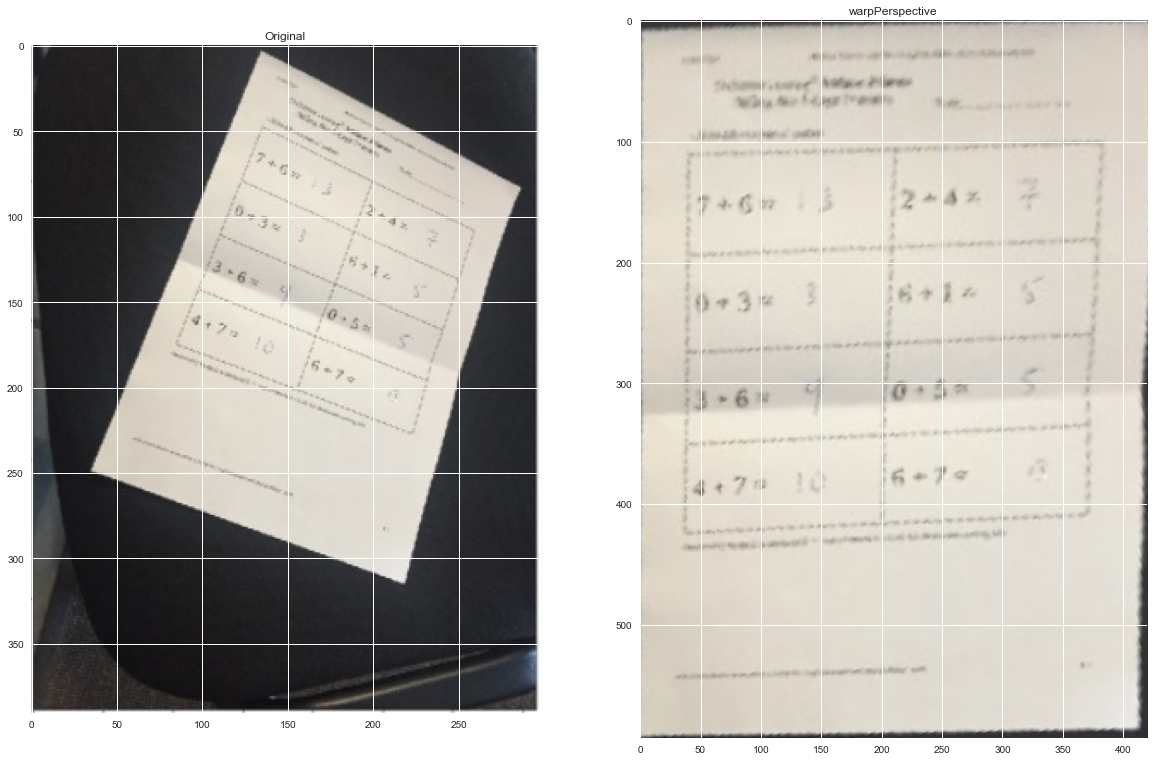

In [4]:
image = cv2.imread('imgs-applications/scan.jpg')
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
points_A = np.float32([[135,0], [280,80], [35,250], [220,320]])
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
M = cv2.getPerspectiveTransform(points_A, points_B)
warped = cv2.warpPerspective(image, M, (420,594))
plt.subplot(1, 2, 2)
plt.title("warpPerspective")
plt.imshow(warped)

In [ ]:
# Load our new image
image = cv2.imread('imgs-applications/Origin_of_Species.jpg', 0)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image,cmap='gray')
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1,cmap='gray')
image = cv2.GaussianBlur(image, (3, 3), 0)
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh,cmap='gray')
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2,cmap='gray')
plt.subplot(3, 2, 5)
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3,cmap='gray')
plt.show()

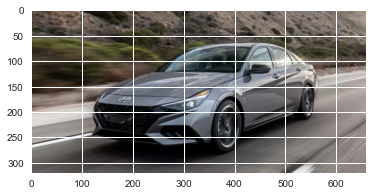

In [5]:
# reading jpg image 
img = img.imread('imgs-applications/car.jpg')
plt.imshow(img)

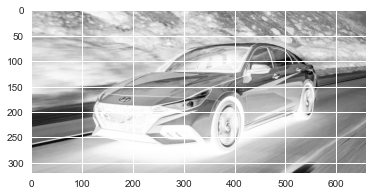

In [6]:
# modifying the shape of the image
lum1 = img[:, :, 0] 
plt.imshow(lum1)

C:\Users\Prof.Hasan ERBAY\AppData\Local\Temp\ipykernel_28928\507622080.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


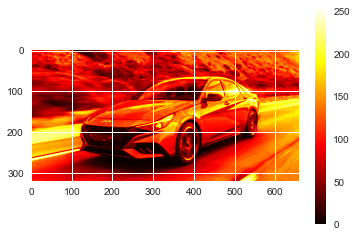

In [7]:
plt.imshow(lum1, cmap ='hot') 
plt.colorbar()

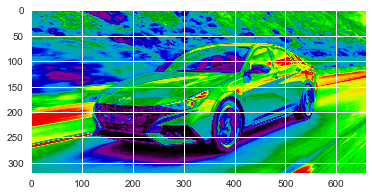

In [8]:
imgplot = plt.imshow(lum1)
imgplot.set_cmap('nipy_spectral')

In [ ]:
img2 = Image.open('imgs-applications/people.jpg')
plt.imshow(img2)

In [14]:
print('Original Dimensions : ',img.shape)

Original Dimensions :  (320, 658, 3)


Resized Dimensions :  (32, 65, 3)


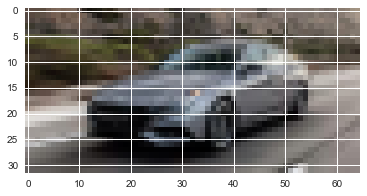

In [13]:
scale_percent = 10 # percent of original size, try with different values
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)# other options: INTER_NEAREST, INTER_CUBIC 
 
print('Resized Dimensions : ',resized.shape)
 
plt.imshow(resized)

In [ ]:
#Angle given 
img_rot= img3.rotate(180)  
plt.imshow(img_rot)

In [ ]:
#transposing image  
transposed_img = img3.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(transposed_img)

### Kabartma Filtresi(Emboss Filter)
Resimdeki kabartma filtresini almak için kod aşağıda gösterilmiştir. İlk olarak, bir kabartma çekirdeği ve kabartma efekti için filtre oluşturduk.

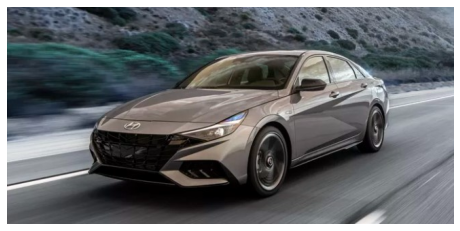

In [15]:
plt.style.use('seaborn')

loaded_img = cv2.imread("imgs-applications/car.jpg")
plt.figure(figsize=(8,8))
plt.imshow(loaded_img,cmap="gray")
plt.axis("off")
plt.show()

In [19]:
Emboss_Kernel = np.array([[0,-1,-1],[1,0,-1],[1,1,0]])

In [25]:
Emboss_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Emboss_Kernel, ddepth=-1)

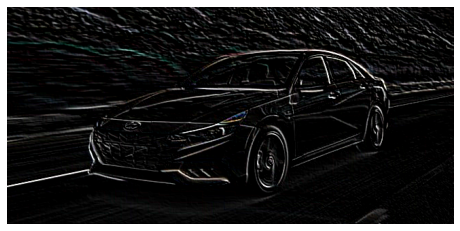

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(Emboss_Effect_Img,cmap="gray")
plt.axis("off")
plt.show()

### Keskinleştirme Filtresi
Resimdeki keskinleştirme filtresini almak için kod aşağıda gösterilmiştir. İlk olarak, keskinleştirme efekti için bir keskinleştirme çekirdeği ve filtre oluşturduk.

In [ ]:
Sharpen_Kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
Sharpen_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Sharpen_Kernel, ddepth=-1)
plt.figure(figsize=(8,8))
plt.imshow(Sharpen_Effect_Img,cmap="gray")
plt.axis("off")
plt.show()

### Sepia Filtresi
Resimdeki Sepia filtresini almak için kod aşağıda gösterilmiştir. İlk önce Sepia çekirdeği ve Sepia efekti için filtre oluşturduk.

In [ ]:
Sepia_Kernel = np.array([[0.272, 0.534, 0.131],[0.349, 0.686, 0.168],[0.393, 0.769, 0.189]])
Sepia_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Sepia_Kernel, ddepth=-1)
plt.figure(figsize=(8,8))
plt.imshow(Sepia_Effect_Img,cmap="gray")
plt.axis("off")
plt.show()

### Bulanıklaştırma Filtresi
Görüntüdeki bulanıklık filtresini almak için kod aşağıda gösterilmiştir. İlk olarak, bir blur kernel ve blur efekti için filtre oluşturduk.

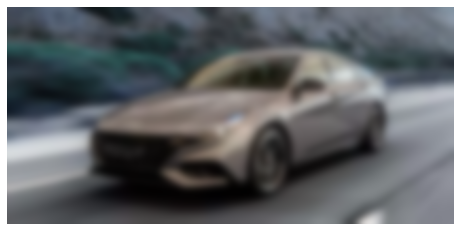

In [29]:
Blur_Effect_Img = cv2.GaussianBlur(loaded_img, (35, 35), 0)
plt.figure(figsize=(8,8))
plt.imshow(Blur_Effect_Img,cmap="gray")
plt.axis("off")
plt.show()

### Kenar Filtresi
Görüntüdeki kenarları çıkarma için kod CannyEdge filtresi.

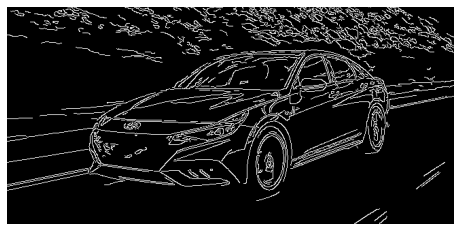

In [28]:
# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold

Edge_Effect_Img = cv2.Canny(loaded_img,t_lower,t_upper)
plt.figure(figsize=(8,8))
plt.imshow(Edge_Effect_Img,cmap="gray")
plt.axis("off")
plt.show()

## Görüntü bölütleme
- Görüntü bölütleme, bir görüntüyü genellikle görüntüdeki piksellerin özelliklerine dayalı olarak birden çok parçaya veya bölgeye bölmek için dijital görüntü işleme ve analizinde yaygın olarak kullanılan bir tekniktir. Görüntü segmentasyonu, ön planın arka plandan ayrılmasını veya renk veya şekildeki benzerliklere dayalı olarak piksel bölgelerinin kümelenmesini içerebilir.
- Görüntü Segmentasyonu esas olarak
    1. Yüz tanıma
    2. Tıbbi Görüntüleme
    3. Makine görme
    4. Otonom Sürüş
- İki tür görüntü bölütleme tekniği vardır.
    - Bağlamsal olmayan eşikleme: Eşikleme, bağlamsal olmayan en basit segmentasyon tekniğidir. Tek bir eşik ile gri tonlamalı veya renkli bir görüntüyü ikili bölge haritası olarak kabul edilen ikili bir görüntüye dönüştürür. İkili harita, biri eşik değerinden daha küçük giriş veri değerlerine sahip pikseller içeren ve diğeri eşik değerinde veya üstünde olan giriş değerleriyle ilgili olan iki olası ayrık bölge içerir. Aşağıdaki eşikleme teknikleri türleridir.
        - Basit eşikleme
        - Uyarlanabilir eşikleme
        - Renk eşikleme
    - Bağlamsal segmentasyon : Bağlamsal olmayan eşikleme, pikselleri görüntü düzlemindeki göreli konumlarını hesaba katmadan gruplandırır. Bağlamsal bölümleme, tek bir nesneye ait piksellerin yakınlığını hesaba kattığı için tek tek nesneleri ayırmada daha başarılı olabilir. Bağlamsal segmentasyona yönelik iki temel yaklaşım, sinyal süreksizliğine veya benzerliğine dayanmaktadır. Süreksizlik tabanlı teknikler, her bir sınır boyunca ani sinyal değişiklikleri varsayarak, nispeten tek biçimli bölgeleri çevreleyen tam sınırları bulmaya çalışır. Benzerliğe dayalı teknikler, belirli benzerlik kriterlerini karşılayan bağlantılı pikselleri bir araya getirerek bu tek biçimli bölgeleri doğrudan oluşturmaya çalışır. Her iki yaklaşım da tam bir sınırın bir bölgeyi ikiye ayırması anlamında birbirini yansıtır. Aşağıdakiler, Bağlamsal segmentasyon türlerini yedi.
        - Piksel bağlantısı
        - Bölge benzerliği
Bölge büyüyor
Böl ve birleştir segmentasyonu
Doku Segmentasyonu : Doku, birçok görüntü analizi veya bilgisayarla görü uygulamasında en önemli özelliktir. Doku problemi için geliştirilen prosedürler dört kategoriye ayrılabilir.
 yapısal yaklaşım
istatistiksel yaklaşım
model tabanlı yaklaşım
 filtre tabanlı yaklaşım
 

## Derin Öğrenme ile Görüntü İşleme Uygulamaları

- Derin Öğrenme, manuel müdehale olmaksızın doğrudan verilerden özelliklerin faydalı temsillerini almak için görüntü işlemede sinir ağlarını uygular. 
- Ağ, eğitim verilerini kullanarak bir nesnenin belirli özelliklerini tanımak için kendini eğitir. 
- Ağ çeşitli katmanlarla çalışır ve her katman bir öncekinden veri alır. 
- Her geçen katmanla birlikte öğrenmenin karmaşıklığı ve detayı artar.

- Görüntü işlemede Derin Öğrenme örnekleri: 
    - Görüntülerden gürültü giderme, 
    - Görüntü sınıflandırma, 
    - Görüntü restorasyonu,
    - Görüntü bölütleme.

## Görüntü Bölütleme türleri
- Görüntü bölütleme, taşıdıkları bilginin miktarına ve türüne göre üç gruba ayrılabilir.

    1. Semantik segmentasyon, belirli bir sınıfa ait nesnelerin geniş bir sınırını ayırırken, örnek segmentasyonu, nesnenin ait olduğu sınıf hakkında herhangi bir fikir olmaksızın görüntüde gördüğü her nesne için bir segment haritası sağlar.
    2. Nesne segmentasyonu, görüntü piksellerini sınıflar yerine “örnekler” temelinde kategorilere ayırır.
    3. Panoptik bölütleme, örnek ve anlamsal bölütleme görevlerinin konjugasyonu olduğu için açık ara en bilgilendirici olanıdır. Panoptik bölütleme, görüntüde bulunan herhangi bir sınıftaki tüm nesnelerin parça haritalarını verir.

### Bu bölütlemeleri daha ayrıntılı olarak inceleyelim.

- Semantik(Anlamsal) segmentasyon
    - Semantik segmentasyon, bir görüntüdeki piksellerin anlamsal sınıflara sınıflandırılmasını ifade eder. Belirli bir sınıfa ait pikseller, başka hiçbir bilgi veya bağlam dikkate alınmadan basitçe o sınıfa sınıflandırılır.
    - Tahmin edilebileceği gibi, görüntüde aynı sınıfın birden çok örneği yakından gruplandırıldığında, bu yetersiz tanımlanmış bir sorun ifadesidir. Bir sokaktaki bir kalabalığın görüntüsü, semantik bir segmentasyon modeline sahip olacak ve tüm kalabalık bölgesini “yaya” sınıfına ait olarak tahmin edecek ve böylece görüntü üzerinde çok az derinlemesine ayrıntı veya bilgi sağlayacaktır.

- Nesne segmentasyonu
    - Nesne segmentasyon modelleri, pikselleri sınıflar yerine “örnekler” temelinde kategorilere ayırır.
    - Bir örnek segmentasyon algoritması, sınıflandırılmış bir bölgenin ait olduğu sınıf hakkında hiçbir fikre sahip değildir, ancak örtüşen veya çok benzer nesne bölgelerini sınırlarına göre ayırabilir.
    - Daha önce bahsettiğimiz bir kalabalığın aynı görüntüsü bir örnek segmentasyon modeline beslenirse, model hem her kişiyi hem de çevresindeki nesneleri (ideal olarak) kalabalıktan ayırabilir, ancak her birinin ne olduğunu tahmin edemez. bölge/nesne bir örneğidir.

- Panoptik segmentasyon
    - En son geliştirilen bölütleme görevi olan panoptik bölütleme, görüntüdeki bir nesnenin her bir örneğinin ayrıldığı ve nesnenin kimliğinin tahmin edildiği semantik bölütleme ve örnek bölütlemenin birleşimi olarak ifade edilebilir.
    - Panoptik segmentasyon algoritmaları, yakın çevre hakkında büyük miktarda bilginin bir görüntü akışı yardımıyla yakalanması gereken sürücüsüz arabalar gibi popüler görevlerde büyük ölçekli uygulanabilirlik bulur.

In [ ]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

segment_original = cv2.imread('imgs-applications/segment_original.jpg')
plt.subplot(221)
plt.imshow(segment_original)
plt.title('Orjinal görüntü', y=1.02, fontsize=12)

segment_semantic = cv2.imread('imgs-applications/segment_semantic.jpg')
plt.subplot(222)
plt.imshow(segment_semantic)
plt.title('Anlamsal segmentasyon', y=1.02, fontsize=12)

segment_instance = cv2.imread('imgs-applications/segment_instance.jpg')
plt.subplot(223)
plt.imshow(segment_instance)
plt.title('Nesne görüntü', y=1.02, fontsize=12)

segment_panoctip = cv2.imread('imgs-applications/segment_panoctip.jpg')
plt.subplot(224)
plt.imshow(segment_panoctip)
plt.title('Panoptik segmentasyon', fontsize=12)

### PixelLib Kütüphanesi
- PixelLib, görüntü ve video segmentasyonu gerçekleştirmek için oluşturulmuş bir kütüphanedir.
- PixelLib, iki temel segmentasyon türünü destekler.:
    1. Semantik segmentasyon: Bir görüntüdeki aynı piksel değerlerine sahip nesneler aynı renk haritalarıyla segmentlere ayrır.
    2. Nesne(Örnek) bölütlendirme: Aynı nesnenin örnekleri farklı renk haritalarıyla bölümlere ayrır.

https://pixellib.readthedocs.io/en/latest/

### Nesne(Örnek) bölütlendirme

#### pointrend_resnet50.pkl modeli

In [1]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

ModuleNotFoundError: No module named 'pixellib'

In [ ]:
segment_image = instanceSegmentation()
segment_image.load_model("pointrend_resnet50.pkl")
segment_image.segmentImage("imgs-applications/people.jpg", output_image_name="imgs-applications/image_new_instance_segmentation.jpg")

In [ ]:
ins = instanceSegmentation()
ins.load_model("pointrend_resnet50.pkl")
ins.segmentImage("imgs-applications/people.jpg", show_bboxes=True, output_image_name="imgs-applications/image_new_instance_segmentation2.jpg")

#### mask_rcnn_coco.h5 modeli

In [ ]:
segment_image = instance_segmentation()
segment_image.load_model("mask_rcnn_coco.h5")
segment_image.segmentImage("sample2.jpg", output_image_name = "image_new.jpg")

### Semantik bölütlendirme

In [ ]:
from pixellib.semantic import semantic_segmentation
segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
segment_image.segmentAsPascalvoc("imgs-applications/people.jpg", output_image_name = "imgs-applications/image_new.jpg")

In [ ]:
results, output = ins.segmentImage("imgs-applications/people.jpg", show_bboxes=True, output_image_name="imgs-applications/image_new.jpg")
print(results)

ins = instanceSegmentation()
ins.load_model("pointrend_resnet50.pkl")

ins.segmentImage("imgs-applications/street.jpg", show_bboxes=True, extract_segmented_objects=True,
save_extracted_objects=True, output_image_name="imgs-applications/output_image.jpg" )

img = cv2.imread('imgs-applications/output_image.jpg')
plt.imshow(img)

In [ ]:
from pixellib.semantic import semantic_segmentation

#created an instance of semantic segmentation class
segment_image = semantic_segmentation()
segment_image.load_model("deeplabv3_xception65_ade20k.h5")
segment_image.segmentAsAde20k("imgs-applications/people.jpg", output_image_name= "imgs-applications/image_new_semantic_segmentation.jpg")